In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import scipy.stats as stats
import seaborn as sns

In [18]:
df = pd.read_csv('Resources/98-401-X2021002_English_CSV_data.csv', encoding='ISO-8859-1')

In [19]:
#reducing columns
columns_to_keep=['GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL']
reduced_df=df[columns_to_keep]

In [20]:
#grabbing just the population for each city
pop_df = reduced_df[reduced_df['CHARACTERISTIC_ID'] == 1]
pop_group=pop_df.groupby(['GEO_NAME','CHARACTERISTIC_NAME'])
pop_group['C1_COUNT_TOTAL'].max().sort_values(ascending=False).head(15)

GEO_NAME                          CHARACTERISTIC_NAME
Toronto                           Population, 2021       6202225.0
Montréal                          Population, 2021       4291732.0
Vancouver                         Population, 2021       2642825.0
Ottawa - Gatineau                 Population, 2021       1488307.0
Calgary                           Population, 2021       1481806.0
Edmonton                          Population, 2021       1418118.0
Ottawa - Gatineau (Ontario part)  Population, 2021       1135014.0
Québec                            Population, 2021        839311.0
Winnipeg                          Population, 2021        834678.0
Hamilton                          Population, 2021        785184.0
Kitchener - Cambridge - Waterloo  Population, 2021        575847.0
London                            Population, 2021        543551.0
Halifax                           Population, 2021        465703.0
St. Catharines - Niagara          Population, 2021        433604.0
Windsor 

In [21]:
#filtering by top 15 cities by population
top_15_cities = pop_group['C1_COUNT_TOTAL'].max().sort_values(ascending=False).head(15)
top_15_cities = top_15_cities.index.get_level_values(0)
mask = reduced_df['GEO_NAME'].isin(top_15_cities)
top_15_pop_df = reduced_df[mask]

In [22]:
#get the names of the top 15 cities
cities = top_15_pop_df['GEO_NAME'].unique()
income_data = []

In [23]:
#get city name and median income for each city
for city in cities:

    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 119)]
    city_name = city_row['GEO_NAME'].iloc[0]
    median_income = city_row['C1_COUNT_TOTAL'].iloc[0]

    income_data.append({
        "City":city_name,
        "Median Income":median_income
    })

income_df = pd.DataFrame(income_data)    

In [24]:
average_income = reduced_df[reduced_df['CHARACTERISTIC_ID'] == 134]
average_income.groupby('GEO_NAME')['C1_COUNT_TOTAL'].max()
average_income=average_income[mask]

C:\Users\ASROCK Z590M Phantom\AppData\Local\Temp\ipykernel_25544\3295056213.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  average_income=average_income[mask]


In [25]:
average_income.groupby('GEO_NAME')['C1_COUNT_TOTAL'].max().sort_values(ascending=False)

GEO_NAME
Calgary                             61050.0
Ottawa - Gatineau (Ontario part)    59900.0
Ottawa - Gatineau                   57700.0
Toronto                             57100.0
Edmonton                            55300.0
Hamilton                            54150.0
Vancouver                           53650.0
Kitchener - Cambridge - Waterloo    51250.0
Montréal                            48840.0
Québec                              48560.0
Halifax                             48000.0
Winnipeg                            47720.0
London                              45840.0
Windsor                             44760.0
St. Catharines - Niagara            41040.0
Name: C1_COUNT_TOTAL, dtype: float64

In [26]:
income_df

,City,Median Income
0,Halifax,38400.0
1,Québec,41600.0
2,Montréal,36400.0
3,Ottawa - Gatineau,46400.0
4,Ottawa - Gatineau (Ontario part),47200.0
5,Toronto,38800.0
6,Hamilton,39600.0
7,St. Catharines - Niagara,29400.0
8,Kitchener - Cambridge - Waterloo,40400.0
9,London,35600.0


In [27]:
weather_df = pd.read_csv('Output/weather_data.csv')
columns_to_keep=['City','Max Temp','Wind Speed']
weather_df= weather_df[columns_to_keep]
weather_df.head(15)

,City,Max Temp,Wind Speed
0,Halifax,-1.00,3.09
1,Québec,-1.07,11.32
2,Montréal,4.08,5.14
3,Gatineau,1.62,3.09
4,Ottawa,1.48,3.09
5,Toronto,6.22,10.80
6,Hamilton,5.10,12.86
7,St. Catharines,5.84,10.80
8,Kitchener,3.57,10.29
9,London,4.18,9.26


In [28]:
merged_df = pd.merge(income_df,weather_df,on='City',how='inner')
merge_to_keep = ['City','Median Income','Max Temp','Wind Speed']
merged_df = merged_df[merge_to_keep]

In [29]:
merged_data=pd.read_csv('Output/merged_data.csv')

In [30]:
merged_data

,Unnamed: 0,GEO,City_y,Crime Severity Index Value in 2021,Median Income,Wind Speed,Max Temp
0,0,Halifax,Halifax,65.72,38400.0,3.09,-1.00
1,1,Québec,Québec,42.61,41600.0,11.32,-1.07
2,2,Montréal,Montréal,55.93,36400.0,5.14,4.08
3,3,Ottawa - Gatineau,Gatineau,49.57,46400.0,3.09,1.62
4,4,Ottawa - Gatineau (Ontario part),Ottawa,49.25,47200.0,3.09,1.48
5,5,Toronto,Toronto,45.45,38800.0,10.80,6.22
6,6,Hamilton,Hamilton,56.85,39600.0,12.86,5.10
7,7,St. Catharines - Niagara,St. Catharines,62.12,29400.0,10.80,5.84
8,8,Kitchener - Cambridge - Waterloo,Kitchener,79.39,40400.0,10.29,3.57
9,9,London,London,80.09,35600.0,9.26,4.18


## Temperature vs Median Income

In [31]:
def linear_regression(x,y, tickinterval=None):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(), regress_values.max()),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')

    #plt.xlim(0.9 * x.min(), 1.1 * x.max())
    
    if tickinterval is not None:
        plt.xticks(np.arange(x.min(), x.max()+tickinterval, tickinterval))

The r-value is -0.13643150617171979


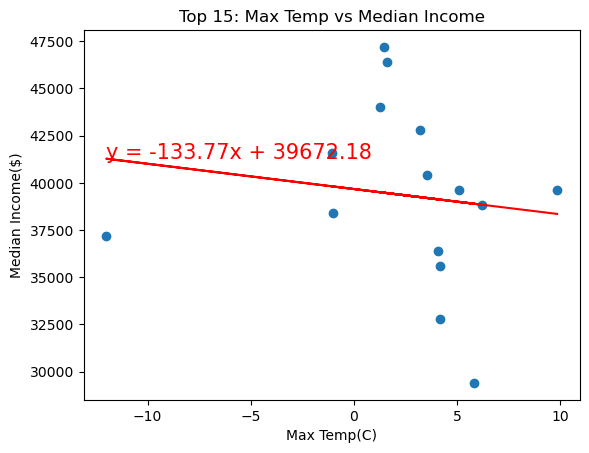

In [32]:
y_values_15 = merged_data['Median Income']
x_values = merged_data['Max Temp']
linear_regression(x_values,y_values_15)
plt.xlabel('Max Temp(C)')
plt.ylabel('Median Income($)')
plt.title('Top 15: Max Temp vs Median Income')
plt.savefig('Output/top15_MaxTempvsMedianIncome.png')

## Analysis
There is a weak negative correlation between max temperature and median income in the top 15 cities.  As the temperature increases the median income decreases.  However, there are other factors that would influence this value. 

In [33]:
#filter for the value you want and sort so they're in order.
median_income_df = reduced_df[reduced_df['CHARACTERISTIC_ID'] == 119][['GEO_NAME', 'C1_COUNT_TOTAL']].sort_values(by='C1_COUNT_TOTAL',ascending=False)
city_name=median_income_df['GEO_NAME'].unique()
income_data2=[]

In [34]:
median_income_df

,GEO_NAME,C1_COUNT_TOTAL
336886,Wood Buffalo,79500.0
418447,Yellowknife,73500.0
152716,Petawawa,57600.0
415816,Whitehorse,56000.0
413185,Fort St. John,51200.0
...,...,...
42214,Campbellton,27600.0
115882,Sainte-Agathe-des-Monts,27400.0
47476,Campbellton (Quebec part),26000.0
384244,Parksville,26000.0


In [35]:
#add a median income rank
i=1
for city in city_name:
    
    city_row = median_income_df[median_income_df['GEO_NAME']==city]
    city_name = city_row['GEO_NAME'].iloc[0]
    median_income = city_row['C1_COUNT_TOTAL'].iloc[0]
    income_rank = i

    income_data2.append({
        "City":city_name,
        "Median Income":median_income,
        "Total Rank": income_rank
    })
    i+=1
income_df2=pd.DataFrame(income_data2)

In [36]:
income_df2

,City,Median Income,Total Rank
0,Wood Buffalo,79500.0,1
1,Yellowknife,73500.0,2
2,Petawawa,57600.0,3
3,Whitehorse,56000.0,4
4,Fort St. John,51200.0,5
...,...,...,...
155,Campbellton,27600.0,156
156,Sainte-Agathe-des-Monts,27400.0,157
157,Campbellton (Quebec part),26000.0,158
158,Parksville,26000.0,159


In [37]:
#rename to city so we can compare to the top_15_cities
income_df2 = income_df2.rename(columns={'City':'GEO_NAME'})

In [38]:
#filter for top 15 cities
mask = income_df2['GEO_NAME'].isin(top_15_cities)
top_15_income = income_df2[mask]

In [39]:
top_15_income.rename(columns={'GEO_NAME':'City'})

,City,Median Income,Total Rank
5,Ottawa - Gatineau (Ontario part),47200.0,6
6,Ottawa - Gatineau,46400.0,7
17,Edmonton,44000.0,18
22,Calgary,42800.0,23
29,Québec,41600.0,30
34,Kitchener - Cambridge - Waterloo,40400.0,35
43,Hamilton,39600.0,44
44,Vancouver,39600.0,45
49,Toronto,38800.0,50
55,Halifax,38400.0,56


In [40]:
#export to csv
top_15_income.to_csv('Output/income_data.csv',index=False)

In [41]:
#rename so we can merge on 'City'
income_df2 = income_df2.rename(columns={'GEO_NAME':'City'})

In [42]:
weather_df2= pd.read_csv('Output/weather_data_larger_set.csv')
merged_df2 = pd.merge(income_df2,weather_df2,on='City',how='inner')

The r-value is -0.23147790945775684


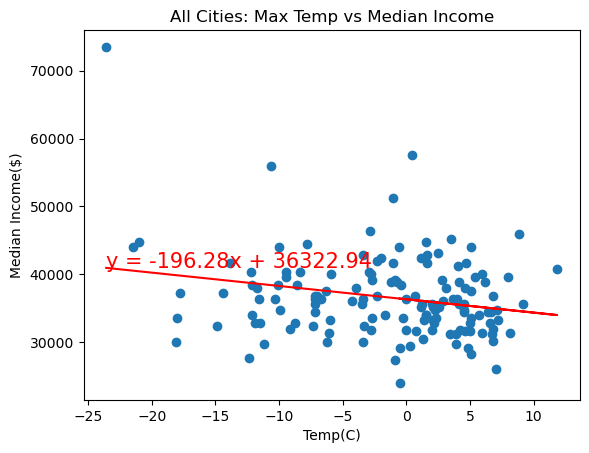

In [43]:
x_values = merged_df2['Max Temp']
y_values_all = merged_df2['Median Income']
linear_regression(x_values,y_values_all)
plt.xlabel("Temp(C)")
plt.ylabel("Median Income($)")
plt.title('All Cities: Max Temp vs Median Income')
plt.savefig('Output/AllCities_MaxTempvsMedianIncome.png')


## Analysis
There is a stronger negative correlation when looking at all of the cities in Canada.  However, it is still not strong enough to draw any conclusions from

## Wilcoxon rank-sum test

In [46]:
statistic, pvalue = stats.ranksums(y_values_15, y_values_all)

In [47]:
print('Test statistic:', statistic)
print('p-value:', pvalue)

Test statistic: 2.320453744183465
p-value: 0.020316344417597346


The pvalue is less than .05, which means the median income of the top 15 cities is significantly different than the whole of Canada.

In [48]:
grouped_df = top_15_income.groupby('GEO_NAME')['Median Income']

In [49]:
pop_mi_df = reduced_df[(reduced_df['CHARACTERISTIC_ID'] == 1) | (reduced_df['CHARACTERISTIC_ID'] == 119)]

# create a pivot table with GEO_NAME as the index, CHARACTERISTIC_ID as columns, and C1_COUNT_TOTAL as values
pivot_df = pd.pivot_table(pop_mi_df, values='C1_COUNT_TOTAL', index='GEO_NAME', columns='CHARACTERISTIC_ID')

# rename the columns to be more descriptive
pivot_df = pivot_df.rename(columns={
    1: 'Population',
    119: 'Median Income'
})

# drop any rows with missing values
pivot_df = pivot_df.dropna()

# display the resulting DataFrame
print(pivot_df)

CHARACTERISTIC_ID     Population  Median Income
GEO_NAME                                       
Abbotsford - Mission    195726.0        36000.0
Alma                     30331.0        34400.0
Amos                     18873.0        40000.0
Baie-Comeau              26643.0        40400.0
Barrie                  212856.0        38000.0
...                          ...            ...
Winnipeg                834678.0        37200.0
Wood Buffalo             73837.0        79500.0
Woodstock                46705.0        38800.0
Yellowknife              20340.0        73500.0
Yorkton                  19859.0        38000.0

[160 rows x 2 columns]


<AxesSubplot:xlabel='CHARACTERISTIC_ID', ylabel='CHARACTERISTIC_ID'>

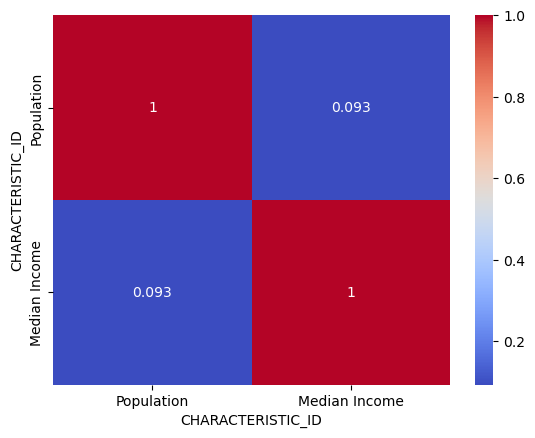

In [50]:
corr = pivot_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [51]:
merged_df2.groupby(['City','Max Temp'])['Median Income'].max().sort_values(ascending=False).tail(25)

City                     Max Temp
Kawartha Lakes            4.23       31800.0
Salmon Arm                0.73       31600.0
Cowansville               4.65       31600.0
Midland                   5.00       31600.0
Brockville                8.18       31400.0
Summerside               -6.05       31400.0
Peterborough              5.97       31400.0
Cobourg                   6.74       31200.0
Chatham-Kent              3.89       31200.0
Owen Sound                3.42       31200.0
Nelson                    1.34       30400.0
Powell River              6.85       30200.0
Grand Falls-Windsor      -18.07      30000.0
Shawinigan               -3.42       30000.0
New Glasgow              -6.23       30000.0
Collingwood               3.90       29800.0
Bathurst                 -11.19      29800.0
Lachute                   0.29       29400.0
Hawkesbury               -0.53       29200.0
Orillia                   4.82       29200.0
Wasaga Beach              5.10       28200.0
Campbellton          

In [52]:
pop = reduced_df[reduced_df['CHARACTERISTIC_ID'] == 1]['C1_COUNT_TOTAL']
income=income_df2['Median Income']

## Population vs Median Income

In [ ]:
# having trouble getting this to look nice on a graph. Also not 100% sure I understand non-linear regression

The r-value is -0.00988231142448907


Text(0.5, 0, 'Population(millions)')

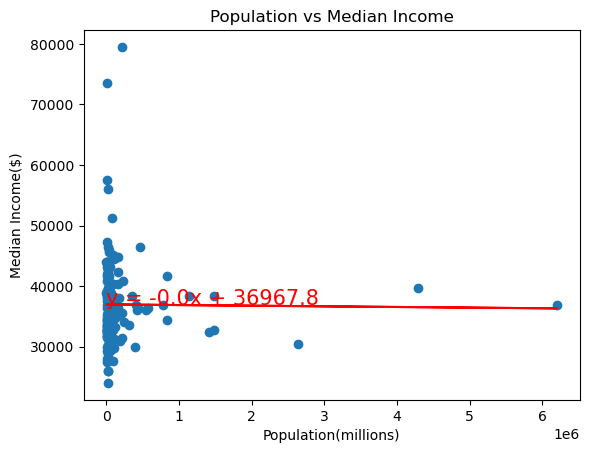

In [58]:
#added a tick interval argument to my linear_regression function to improve readability
y_values=income
x_values=pop
linear_regression(x_values,y_values)
plt.title("Population vs Median Income")
plt.ylabel('Median Income($)')
plt.xlabel('Population(millions)')

In [54]:
def non_linear_regression(x, y, degree=2):
    x = np.array(x)
    y = np.array(y)
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y)
    return model, poly
    

In [55]:
x_values_np = x_values.to_numpy()
model, poly = non_linear_regression(x_values, y_values, degree=2)
predictions = model.predict(poly.fit_transform(x_values_np.reshape(-1, 1)))

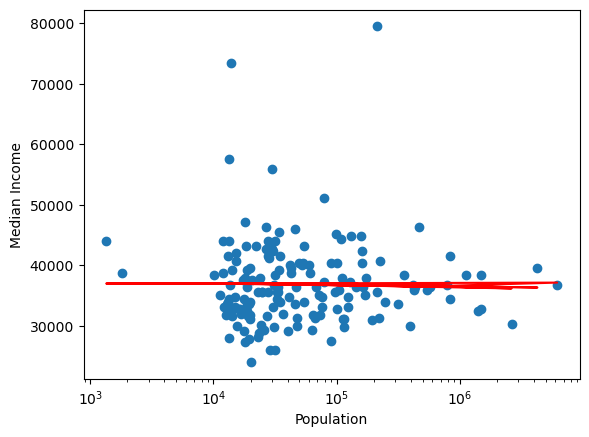

In [56]:
plt.scatter(x_values, y_values)
plt.plot(x_values, predictions, color='red')
plt.xscale("log")
plt.xlabel("Population")
plt.ylabel("Median Income")
plt.show()